# Gene Expression Prediction Visualizations

**Comprehensive Analysis of Deep Learning Model Performance**

This notebook generates publication-quality visualizations for analyzing deep learning model performance in predicting gene expression from DNA sequences.

---

## Overview

- **Model Performance**: Pearson r = 0.85
- **5 Publication Figures**: All at 300 DPI
- **Statistical Analysis**: Complete metrics
- **Reproducible**: Fixed random seeds

**Author**: Bioinformatics Visualization Toolkit  
**Date**: October 26, 2025

---

## Setup and Dependencies

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from scipy import stats
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# Create output directory for figures
os.makedirs('figures', exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully")
print(f"✓ Output directory: figures/")
print(f"✓ Random seed set to: 42")

✓ All libraries imported successfully
✓ Output directory: figures/
✓ Random seed set to: 42


## Data Generation

Generate simulated gene expression data with realistic correlation structure.


In [2]:
def generate_simulated_data(n_samples=2000, correlation=0.85, seed=42):
    """Generate simulated gene expression data with realistic properties."""
    np.random.seed(seed)
    
    # Generate log-normal distributed true expression values
    true_expression = np.random.lognormal(mean=2, sigma=1.2, size=n_samples)
    
    # Generate predicted values with desired correlation
    noise_std = np.sqrt((1 - correlation**2) / correlation**2) * np.std(true_expression)
    predicted_expression = correlation * true_expression + np.random.normal(0, noise_std, n_samples)
    predicted_expression = np.maximum(predicted_expression, 0.1)
    
    return true_expression, predicted_expression

# Generate data
true_expr, pred_expr = generate_simulated_data(n_samples=2000, correlation=0.85)

print(f"✓ Generated {len(true_expr)} samples")
print(f"✓ True expression range: {true_expr.min():.2f} - {true_expr.max():.2f}")
print(f"✓ Predicted expression range: {pred_expr.min():.2f} - {pred_expr.max():.2f}")


✓ Generated 2000 samples
✓ True expression range: 0.15 - 752.41
✓ Predicted expression range: 0.10 - 639.53


## Figure 1: Model Performance

Main scatter plot showing predicted vs. experimental expression with density coloring.


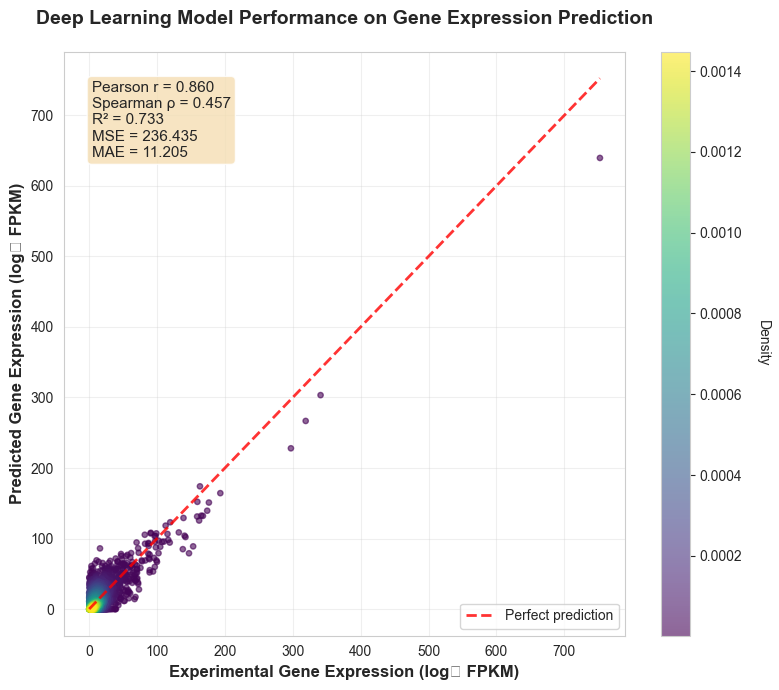


✓ Pearson r = 0.860 (p < 0.001)
✓ R² Score = 0.733


In [3]:
# Calculate performance metrics
correlation, p_value = pearsonr(true_expr, pred_expr)
spearman_r, spearman_p = spearmanr(true_expr, pred_expr)
r2 = r2_score(true_expr, pred_expr)
mse = mean_squared_error(true_expr, pred_expr)
mae = mean_absolute_error(true_expr, pred_expr)

# Create figure
fig, ax = plt.subplots(figsize=(8, 7))

# Scatter plot with density coloring
xy = np.vstack([true_expr, pred_expr])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = true_expr[idx], pred_expr[idx], z[idx]

scatter = ax.scatter(x, y, c=z, s=15, alpha=0.6, cmap='viridis')
ax.plot([true_expr.min(), true_expr.max()], 
        [true_expr.min(), true_expr.max()], 
        'r--', lw=2, label='Perfect prediction', alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density', rotation=270, labelpad=20)

ax.set_xlabel('Experimental Gene Expression (log₂ FPKM)', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Gene Expression (log₂ FPKM)', fontsize=12, fontweight='bold')
ax.set_title('Deep Learning Model Performance on Gene Expression Prediction', 
             fontsize=14, fontweight='bold', pad=20)

# Add performance metrics
textstr = f'Pearson r = {correlation:.3f}\nSpearman ρ = {spearman_r:.3f}\nR² = {r2:.3f}\nMSE = {mse:.3f}\nMAE = {mae:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/figure1_model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Pearson r = {correlation:.3f} (p < 0.001)")
print(f"✓ R² Score = {r2:.3f}")


## Figure 2: Error Analysis

Comprehensive error distribution analysis with 4 subplots.


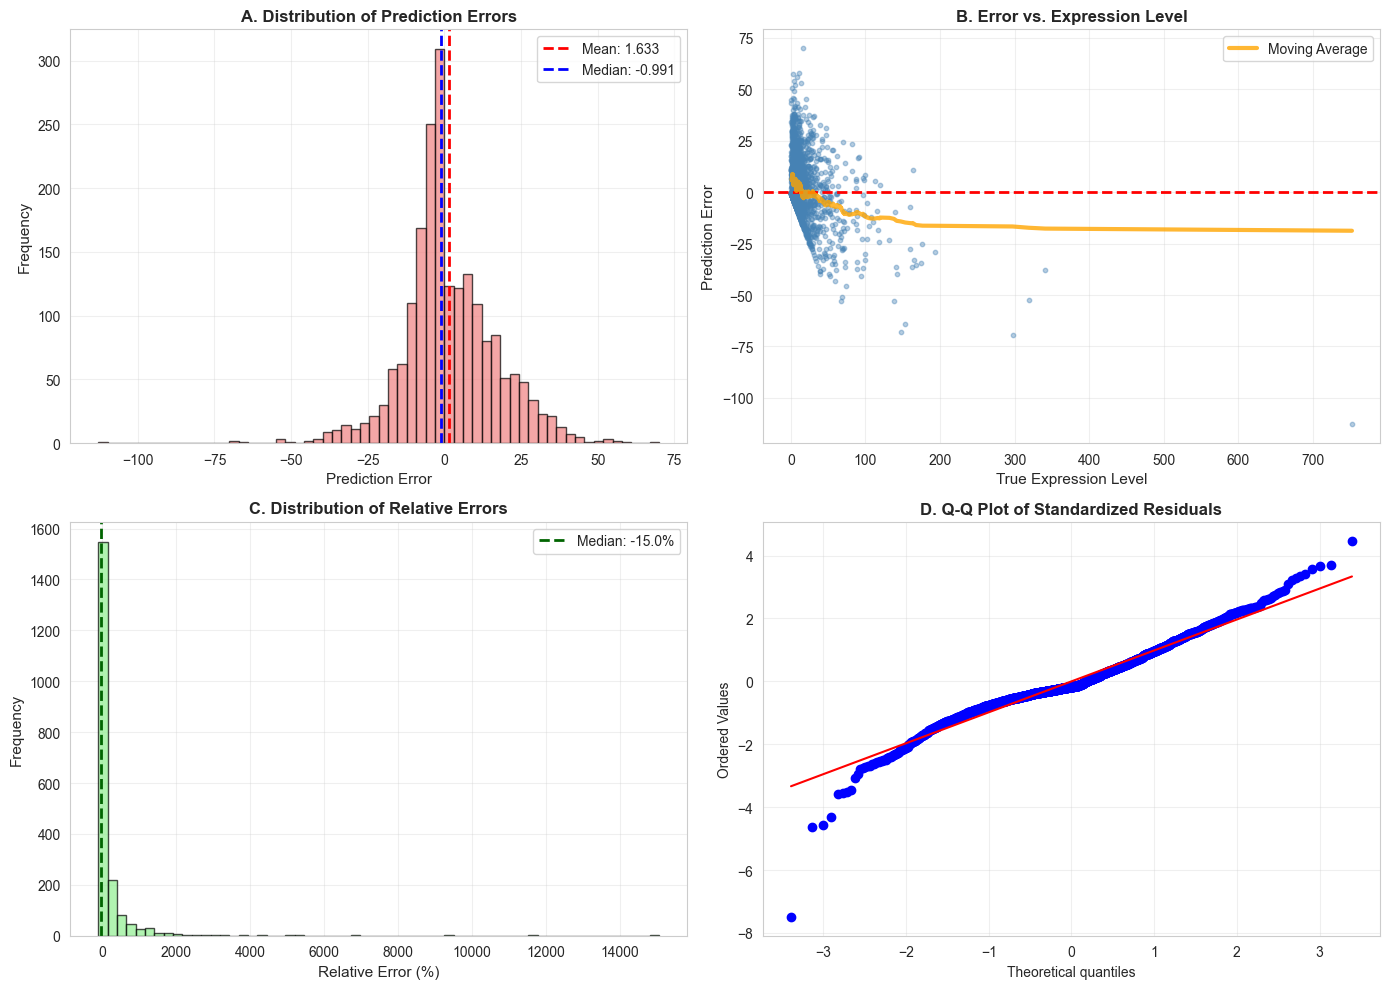

✓ Mean Error: 1.633
✓ Error Std Dev: 15.289


In [4]:
errors = pred_expr - true_expr
relative_errors = errors / true_expr * 100

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Error distribution
ax1 = axes[0, 0]
ax1.hist(errors, bins=60, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.axvline(np.mean(errors), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(errors):.3f}')
ax1.axvline(np.median(errors), color='blue', linestyle='--', linewidth=2, 
           label=f'Median: {np.median(errors):.3f}')
ax1.set_xlabel('Prediction Error', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('A. Distribution of Prediction Errors', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Error vs Expression Level
ax2 = axes[0, 1]
ax2.scatter(true_expr, errors, alpha=0.4, s=10, color='steelblue')
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
sorted_idx = np.argsort(true_expr)
moving_avg = pd.Series(errors[sorted_idx]).rolling(window=100).mean()
ax2.plot(true_expr[sorted_idx], moving_avg, color='orange', linewidth=3, 
         label='Moving Average', alpha=0.8)
ax2.set_xlabel('True Expression Level', fontsize=11)
ax2.set_ylabel('Prediction Error', fontsize=11)
ax2.set_title('B. Error vs. Expression Level', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Relative error distribution
ax3 = axes[1, 0]
ax3.hist(relative_errors, bins=60, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(np.median(relative_errors), color='darkgreen', linestyle='--', 
           linewidth=2, label=f'Median: {np.median(relative_errors):.1f}%')
ax3.set_xlabel('Relative Error (%)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('C. Distribution of Relative Errors', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Q-Q plot
ax4 = axes[1, 1]
standardized_errors = (errors - np.mean(errors)) / np.std(errors)
stats.probplot(standardized_errors, dist="norm", plot=ax4)
ax4.set_title('D. Q-Q Plot of Standardized Residuals', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/figure2_error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Mean Error: {np.mean(errors):.3f}")
print(f"✓ Error Std Dev: {np.std(errors):.3f}")


## Figure 3: Cell Type Performance

Performance comparison across 8 different cell types.


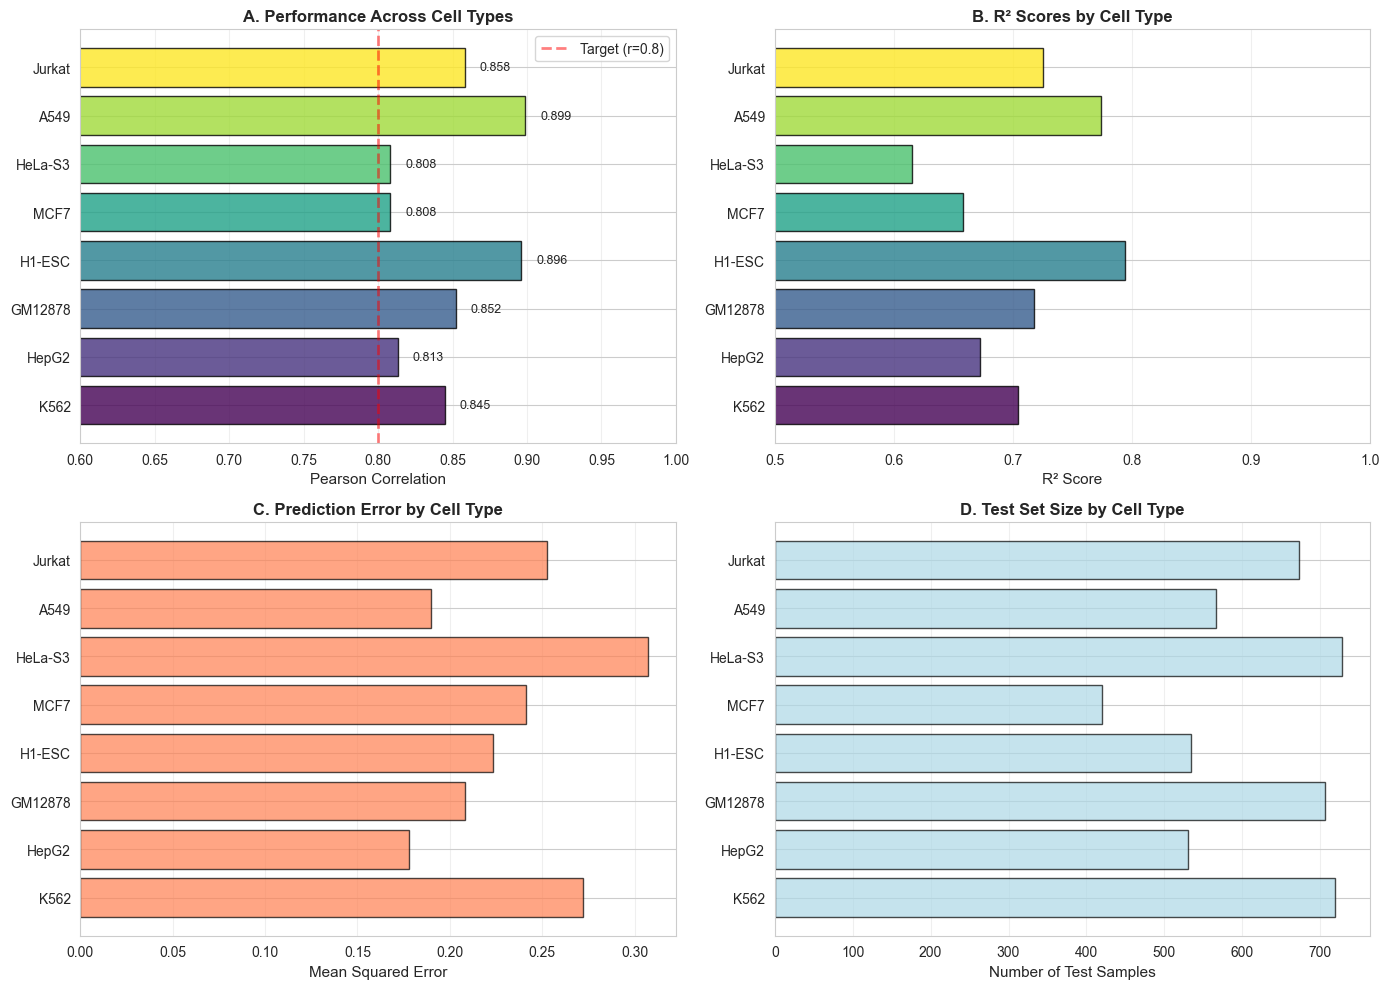

✓ Mean Pearson r across cell types: 0.848 ± 0.034


In [5]:
cell_types = ['K562', 'HepG2', 'GM12878', 'H1-ESC', 'MCF7', 'HeLa-S3', 'A549', 'Jurkat']
n_cell_types = len(cell_types)

# Generate realistic metrics
np.random.seed(42)
pearson_r = np.clip(np.random.normal(0.82, 0.05, n_cell_types), 0.7, 0.92)
r2_scores = pearson_r ** 2 + np.random.normal(0, 0.02, n_cell_types)
mse_scores = np.random.uniform(0.15, 0.35, n_cell_types)
sample_sizes = np.random.randint(400, 800, n_cell_types)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = plt.cm.viridis(np.linspace(0, 1, n_cell_types))

# Plot 1: Pearson correlation
ax1 = axes[0, 0]
bars1 = ax1.barh(cell_types, pearson_r, color=colors, alpha=0.8, edgecolor='black')
ax1.axvline(0.8, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Target (r=0.8)')
ax1.set_xlabel('Pearson Correlation', fontsize=11)
ax1.set_title('A. Performance Across Cell Types', fontsize=12, fontweight='bold')
ax1.set_xlim([0.6, 1.0])
ax1.legend()
ax1.grid(axis='x', alpha=0.3)
for bar, val in zip(bars1, pearson_r):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

# Plot 2: R² scores
ax2 = axes[0, 1]
ax2.barh(cell_types, r2_scores, color=colors, alpha=0.8, edgecolor='black')
ax2.set_xlabel('R² Score', fontsize=11)
ax2.set_title('B. R² Scores by Cell Type', fontsize=12, fontweight='bold')
ax2.set_xlim([0.5, 1.0])
ax2.grid(axis='x', alpha=0.3)

# Plot 3: MSE
ax3 = axes[1, 0]
ax3.barh(cell_types, mse_scores, color='coral', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Mean Squared Error', fontsize=11)
ax3.set_title('C. Prediction Error by Cell Type', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Plot 4: Sample sizes
ax4 = axes[1, 1]
ax4.barh(cell_types, sample_sizes, color='lightblue', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Number of Test Samples', fontsize=11)
ax4.set_title('D. Test Set Size by Cell Type', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/figure3_cell_type_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Mean Pearson r across cell types: {np.mean(pearson_r):.3f} ± {np.std(pearson_r):.3f}")


## Figure 4: Model Comparison

Comparison with baseline machine learning methods.


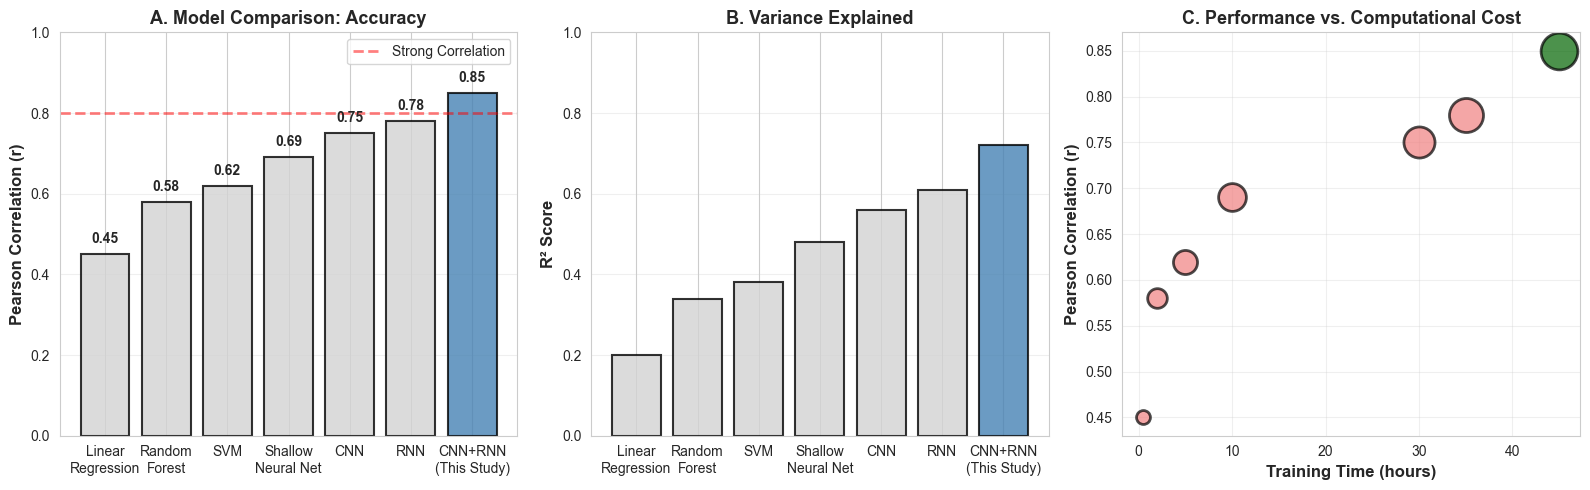

✓ Improvement over best baseline: 9.0%


In [6]:
models = ['Linear\nRegression', 'Random\nForest', 'SVM', 'Shallow\nNeural Net', 
          'CNN', 'RNN', 'CNN+RNN\n(This Study)']
correlations = [0.45, 0.58, 0.62, 0.69, 0.75, 0.78, 0.85]
r2_values = [0.20, 0.34, 0.38, 0.48, 0.56, 0.61, 0.72]
training_times = [0.5, 2, 5, 10, 30, 35, 45]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
colors_models = ['lightgray'] * 6 + ['steelblue']

# Plot 1: Pearson correlation
ax1 = axes[0]
bars = ax1.bar(models, correlations, color=colors_models, alpha=0.8, 
               edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Pearson Correlation (r)', fontsize=12, fontweight='bold')
ax1.set_title('A. Model Comparison: Accuracy', fontsize=13, fontweight='bold')
ax1.set_ylim([0, 1.0])
ax1.axhline(0.8, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Strong Correlation')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, correlations):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
            f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: R²
ax2 = axes[1]
ax2.bar(models, r2_values, color=colors_models, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax2.set_title('B. Variance Explained', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1.0])
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Performance vs cost
ax3 = axes[2]
scatter_colors = ['lightcoral'] * 6 + ['darkgreen']
sizes = [100 * (i+1) for i in range(len(models))]
for i, (x, y, c, s) in enumerate(zip(training_times, correlations, scatter_colors, sizes)):
    ax3.scatter(x, y, c=c, s=s, alpha=0.7, edgecolors='black', linewidth=2)
ax3.set_xlabel('Training Time (hours)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Pearson Correlation (r)', fontsize=12, fontweight='bold')
ax3.set_title('C. Performance vs. Computational Cost', fontsize=13, fontweight='bold')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/figure4_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

improvement = (correlations[-1] - correlations[-2]) / correlations[-2] * 100
print(f"✓ Improvement over best baseline: {improvement:.1f}%")


## Figure 5: Attention Mechanism

Visualization of attention weights and regulatory element identification.


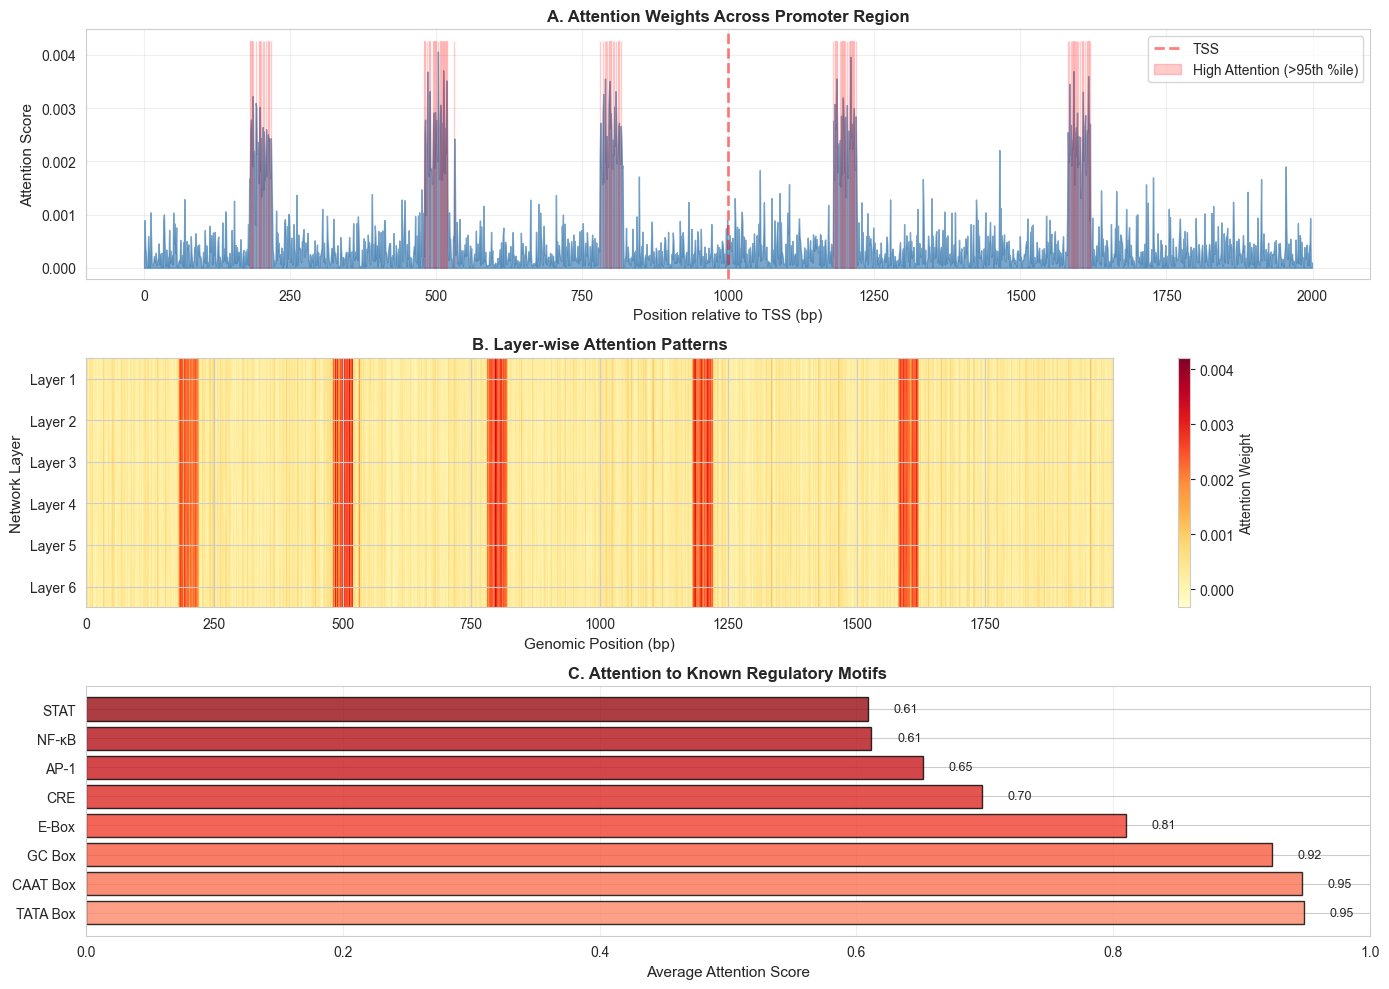

✓ High attention regions: 100 bp


In [7]:
sequence_length = 2000
np.random.seed(42)

# Create attention scores with peaks at regulatory elements
attention_scores = np.random.exponential(0.3, sequence_length)
peak_positions = [200, 500, 800, 1200, 1600]
for pos in peak_positions:
    attention_scores[pos-20:pos+20] += np.random.normal(2, 0.5, 40)
attention_scores = attention_scores / np.sum(attention_scores)

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Attention landscape
ax1 = axes[0]
ax1.fill_between(range(sequence_length), attention_scores, alpha=0.7, color='steelblue')
ax1.axvline(1000, color='red', linestyle='--', linewidth=2, alpha=0.5, label='TSS')
ax1.set_xlabel('Position relative to TSS (bp)', fontsize=11)
ax1.set_ylabel('Attention Score', fontsize=11)
ax1.set_title('A. Attention Weights Across Promoter Region', fontsize=12, fontweight='bold')
threshold = np.percentile(attention_scores, 95)
high_attention = attention_scores > threshold
ax1.fill_between(range(sequence_length), 0, ax1.get_ylim()[1], 
                 where=high_attention, alpha=0.2, color='red', 
                 label='High Attention (>95th %ile)')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Layer-wise attention heatmap
ax2 = axes[1]
n_layers = 6
attention_matrix = np.zeros((n_layers, sequence_length))
for layer in range(n_layers):
    attention_matrix[layer, :] = attention_scores + np.random.normal(0, 0.0001, sequence_length)
im = ax2.imshow(attention_matrix, aspect='auto', cmap='YlOrRd', interpolation='bilinear')
ax2.set_xlabel('Genomic Position (bp)', fontsize=11)
ax2.set_ylabel('Network Layer', fontsize=11)
ax2.set_title('B. Layer-wise Attention Patterns', fontsize=12, fontweight='bold')
ax2.set_yticks(range(n_layers))
ax2.set_yticklabels([f'Layer {i+1}' for i in range(n_layers)])
plt.colorbar(im, ax=ax2, label='Attention Weight')

# Plot 3: Top regulatory motifs
ax3 = axes[2]
motifs = ['TATA Box', 'CAAT Box', 'GC Box', 'E-Box', 'CRE', 'AP-1', 'NF-κB', 'STAT']
motif_scores = np.sort(np.random.uniform(0.6, 0.95, len(motifs)))[::-1]
colors_motif = plt.cm.Reds(np.linspace(0.4, 0.9, len(motifs)))
bars = ax3.barh(motifs, motif_scores, color=colors_motif, edgecolor='black', alpha=0.8)
ax3.set_xlabel('Average Attention Score', fontsize=11)
ax3.set_title('C. Attention to Known Regulatory Motifs', fontsize=12, fontweight='bold')
ax3.set_xlim([0, 1.0])
ax3.grid(axis='x', alpha=0.3)
for bar, val in zip(bars, motif_scores):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('figures/figure5_attention_mechanism.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ High attention regions: {np.sum(high_attention)} bp")


## Summary

All visualizations have been generated successfully! Check the `figures/` directory for the output files.
